In [16]:
import pickle
#from pycaret.regression import *
from pycaret.classification import *
from pycaret.utils import check_metric

In [17]:
os.getcwd()

'c:\\Users\\Braya\\OneDrive\\Documentos\\DS4A'

In [104]:
#Open the.pickle file
with open('C:/Users/Braya/OneDrive/Documentos/DS4A/consolidado_datos.pickle', 'rb') as f:
    loaded_obj = pickle.load(f)

In [105]:
loaded_obj.columns

Index(['ANO', 'COD_MUNICIPIO', 'MUNICIPIO', 'ACCESOS_FIJOS', 'POBLACION',
       'INDICADOR_INTERNET', 'Acueducto', 'Alcantarillado', 'Energiaelectrica',
       'Gasnatural', 'PERIODO', 'ESTU_COD_RESIDE_MCPIO',
       'PUNT_LECTURA_CRITICA_MIN', 'PUNT_LECTURA_CRITICA_Q25',
       'PUNT_LECTURA_CRITICA_MEAN', 'PUNT_LECTURA_CRITICA_MEDIAN',
       'PUNT_LECTURA_CRITICA_Q75', 'PUNT_LECTURA_CRITICA_MAX',
       'PUNT_LECTURA_CRITICA_STD', 'PUNT_MATEMATICAS_MIN',
       'PUNT_MATEMATICAS_Q25', 'PUNT_MATEMATICAS_MEAN',
       'PUNT_MATEMATICAS_MEDIAN', 'PUNT_MATEMATICAS_Q75',
       'PUNT_MATEMATICAS_MAX', 'PUNT_MATEMATICAS_STD', 'PUNT_C_NATURALES_MIN',
       'PUNT_C_NATURALES_Q25', 'PUNT_C_NATURALES_MEAN',
       'PUNT_C_NATURALES_MEDIAN', 'PUNT_C_NATURALES_Q75',
       'PUNT_C_NATURALES_MAX', 'PUNT_C_NATURALES_STD',
       'PUNT_SOCIALES_CIUDADANAS_MIN', 'PUNT_SOCIALES_CIUDADANAS_Q25',
       'PUNT_SOCIALES_CIUDADANAS_MEAN', 'PUNT_SOCIALES_CIUDADANAS_MEDIAN',
       'PUNT_SOCIALES_CIUDADA

In [106]:
id(loaded_obj)

2091720722224

In [108]:
# Predecir puntaje global promedio
#dataset = data_bi[['INDICADOR_INTERNET', 'INDICADOR_ACUEDUCTO', 'INDICADOR_ALCANTARILLADO', 'INDICADOR_ENERGIA_ELECTRICA', 'INDICADOR_GAS_NATURAL', 'KmDist', 'PUNT_GLOBAL_MEAN']]
#dataset = data_bi[['INDICADOR_INTERNET', 'INDICADOR_ALCANTARILLADO', 'INDICADOR_ENERGIA_ELECTRICA', 'INDICADOR_GAS_NATURAL', 'KmDist', 'PUNT_GLOBAL_MEAN']]
#dataset = data_bi[['INDICADOR_INTERNET', 'INDICADOR_ENERGIA_ELECTRICA', 'INDICADOR_GAS_NATURAL', 'KmDist', 'PUNT_GLOBAL_MEAN']]
#dataset = data_bi[['INDICADOR_INTERNET', 'INDICADOR_ENERGIA_ELECTRICA', 'KmDist', 'PUNT_GLOBAL_MEAN']]
dataset = data_bi[['INDICADOR_INTERNET', 'INDICADOR_GAS_NATURAL', 'KmDist', 'PUNT_GLOBAL_MEAN']] # Mean accuracy 0.81

In [109]:
id(dataset)

2091720698272

In [110]:
dataset.PUNT_GLOBAL_MEAN.mean()

0.5172413793103449

In [111]:
data = dataset.sample(frac=0.8, random_state=1409)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (186, 4)
Unseen Data For Predictions: (46, 4)


In [112]:
exp_reg1 = setup(data = data, target = 'PUNT_GLOBAL_MEAN', session_id=1409)

,Description,Value
0,session_id,1409
1,Target,PUNT_GLOBAL_MEAN
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(186, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [113]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7692,0.8250,0.7405,0.7990,0.7616,0.5393,0.5487,0.0120
rf,Random Forest Classifier,0.7615,0.8095,0.7310,0.7893,0.7477,0.5268,0.5382,0.0490
gbc,Gradient Boosting Classifier,0.7538,0.8131,0.7595,0.7632,0.7549,0.5072,0.5146,0.0120
et,Extra Trees Classifier,0.7538,0.8024,0.7143,0.7889,0.7400,0.5115,0.5234,0.0350
lda,Linear Discriminant Analysis,0.7308,0.7405,0.5452,0.8933,0.6584,0.4651,0.5129,0.0030
lightgbm,Light Gradient Boosting Machine,0.7308,0.7905,0.7095,0.7518,0.7188,0.4612,0.4709,0.0040
dt,Decision Tree Classifier,0.6923,0.6952,0.6810,0.7098,0.6785,0.3883,0.4081,0.0030
qda,Quadratic Discriminant Analysis,0.6846,0.7452,0.4571,0.8600,0.5782,0.3774,0.4311,0.0030
nb,Naive Bayes,0.6615,0.7333,0.4429,0.8133,0.5529,0.3318,0.3770,0.0020
ada,Ada Boost Classifier,0.6615,0.6619,0.6833,0.6724,0.6574,0.3282,0.3480,0.0230


In [114]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6923,0.7857,0.6667,0.6667,0.6667,0.3810,0.3810
1,0.7692,0.8214,0.8333,0.7143,0.7692,0.5412,0.5476
2,0.7692,0.8571,0.6667,0.8000,0.7273,0.5301,0.5367
3,0.6154,0.7619,0.6667,0.5714,0.6154,0.2353,0.2381
4,0.8462,0.8571,0.8571,0.8571,0.8571,0.6905,0.6905
5,0.7692,0.7857,0.5714,1.0000,0.7273,0.5517,0.6172
6,0.9231,0.9524,0.8571,1.0000,0.9231,0.8471,0.8571
7,0.8462,0.8095,0.8571,0.8571,0.8571,0.6905,0.6905
8,0.8462,0.9286,0.8571,0.8571,0.8571,0.6905,0.6905


In [115]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.7381,0.8333,0.5556,0.6667,0.2529,0.2829
1,0.6154,0.7500,0.8333,0.5556,0.6667,0.2529,0.2829
2,0.6923,0.8333,0.8333,0.6250,0.7143,0.3953,0.4148
3,0.6154,0.8333,0.8333,0.5556,0.6667,0.2529,0.2829
4,0.7692,0.8571,0.8571,0.7500,0.8000,0.5301,0.5367
5,0.6154,0.8095,0.7143,0.6250,0.6667,0.2169,0.2196
6,0.7692,0.9524,0.8571,0.7500,0.8000,0.5301,0.5367
7,0.6154,0.8333,0.8571,0.6000,0.7059,0.1975,0.2254
8,0.7692,0.9048,0.8571,0.7500,0.8000,0.5301,0.5367


In [116]:
print(xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1409, reg_alpha=0, ...)


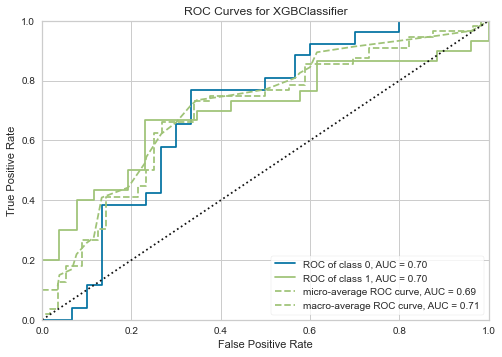

In [122]:
plot_model(xgboost)

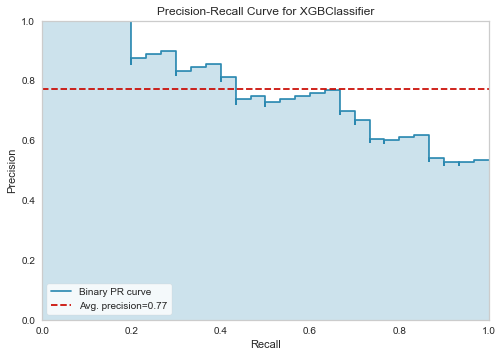

In [123]:
plot_model(xgboost, plot = 'pr')

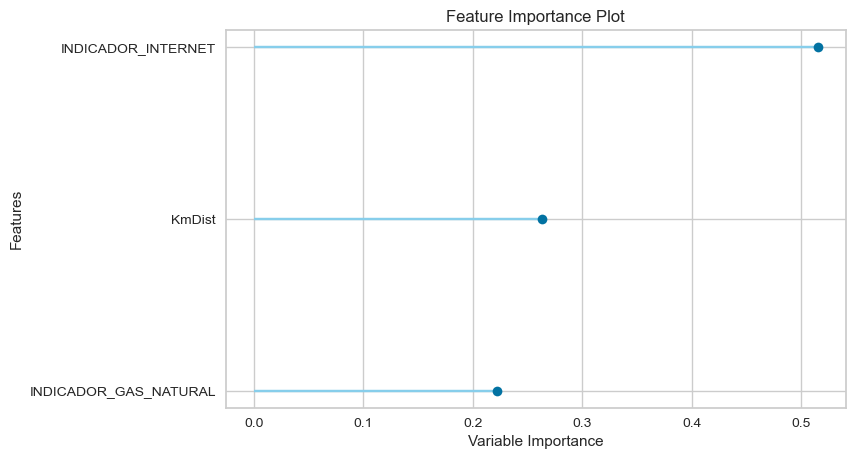

In [124]:
plot_model(xgboost, plot = 'feature')

In [125]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [126]:
predict_model(xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6607,0.6987,0.6667,0.6897,0.6780,0.3197,0.3199


,INDICADOR_INTERNET,INDICADOR_GAS_NATURAL,KmDist,PUNT_GLOBAL_MEAN,Label,Score
0,0.0162,0.069865,49.353523,1,1,0.8419
1,0.0470,0.290908,46.405613,0,0,0.9541
2,0.0673,0.107162,29.993555,1,1,0.8439
3,0.0237,0.108991,54.052963,1,0,0.9808
4,0.0852,0.123807,23.716885,0,1,0.9901
5,0.0946,0.087932,6.514458,1,1,0.9972
6,0.1782,0.221016,8.344154,1,1,0.7718
7,0.0630,0.126357,18.208433,0,1,0.9701
8,0.0413,0.190545,17.041548,1,1,0.8951
9,0.0186,0.062105,36.466366,1,0,0.5606


In [129]:
final_xgboost = finalize_model(xgboost)

In [130]:
print(final_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1409, reg_alpha=0, ...)


In [131]:
predict_model(final_xgboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [132]:
unseen_predictions = predict_model(final_xgboost, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.6739,0.7036,0.7917,0.6552,0.7170,0.3403,0.3489


,INDICADOR_INTERNET,INDICADOR_GAS_NATURAL,KmDist,PUNT_GLOBAL_MEAN,Label,Score
0,0.0164,0.068608,41.682092,0,1,0.9853
1,0.0203,0.067349,8.818185,0,0,0.8966
2,0.0114,0.051046,28.212119,1,0,0.9667
3,0.0519,0.097712,16.030613,1,1,0.9607
4,0.0193,0.084841,57.498683,1,1,0.5793


In [133]:
check_metric(unseen_predictions.PUNT_GLOBAL_MEAN, unseen_predictions.Label, 'Accuracy')

0.6739

In [144]:
##############

In [145]:
exp_reg2 = setup(data = data, target = 'PUNT_GLOBAL_MEAN', session_id=1409,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = True, experiment_name = 'dataset2')

,Description,Value
0,session_id,1409
1,Target,PUNT_GLOBAL_MEAN
2,Original Data,"(209, 3)"
3,Missing Values,True
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(146, 2)"


In [146]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,9.3119,134.1157,11.4601,0.1918,0.0467,0.0380,0.0120
br,Bayesian Ridge,9.2977,134.2331,11.5224,0.1747,0.0468,0.0379,0.0060
ridge,Ridge Regression,9.3023,134.0354,11.5161,0.1741,0.0467,0.0379,0.0060
lr,Linear Regression,9.3106,134.0601,11.5187,0.1730,0.0468,0.0379,0.0100
lar,Least Angle Regression,9.3106,134.0600,11.5187,0.1730,0.0468,0.0379,0.0070
huber,Huber Regressor,9.2428,135.3727,11.5563,0.1607,0.0470,0.0377,0.0060
omp,Orthogonal Matching Pursuit,9.2574,138.8295,11.6479,0.1551,0.0473,0.0377,0.0070
lightgbm,Light Gradient Boosting Machine,9.4238,136.5118,11.5661,0.1405,0.0470,0.0385,0.0090
knn,K Neighbors Regressor,9.5389,135.5327,11.4892,0.1240,0.0468,0.0389,0.0080
rf,Random Forest Regressor,9.3619,147.7900,12.0270,0.0669,0.0490,0.0383,0.0320


In [237]:
######### Modelos regresion lineal ####
import statsmodels.formula.api as smf
import statsmodels.api         as sm

In [315]:
#formula = 'PUNT_GLOBAL_MEAN ~ INDICADOR_INTERNET + INDICADOR_ACUEDUCTO + INDICADOR_ALCANTARILLADO + INDICADOR_ENERGIA_ELECTRICA + INDICADOR_GAS_NATURAL + KmDist'
#formula = 'PUNT_GLOBAL_MEAN ~ INDICADOR_INTERNET + INDICADOR_ACUEDUCTO + INDICADOR_ALCANTARILLADO + INDICADOR_GAS_NATURAL + KmDist'
#formula = 'PUNT_GLOBAL_MEAN ~ INDICADOR_INTERNET + INDICADOR_ACUEDUCTO + INDICADOR_GAS_NATURAL + KmDist'
formula = 'PUNT_GLOBAL_MEAN ~ INDICADOR_INTERNET + INDICADOR_GAS_NATURAL + KmDist' # la mejor
#formula = 'PUNT_GLOBAL_MEAN ~ INDICADOR_INTERNET + KmDist'
#formula = 'np.log(PUNT_GLOBAL_MEAN) ~ np.log(INDICADOR_INTERNET) + np.log(INDICADOR_GAS_NATURAL) + np.log(KmDist)' # la mejor con log

In [316]:
data['INDICADOR_GAS_NATURAL'] = data['INDICADOR_GAS_NATURAL'].astype(float)
data['INDICADOR_ACUEDUCTO'] = data['INDICADOR_ACUEDUCTO'].astype(float)
data['INDICADOR_ALCANTARILLADO'] = data['INDICADOR_ALCANTARILLADO'].astype(float)
data['INDICADOR_ENERGIA_ELECTRICA'] = data['INDICADOR_ENERGIA_ELECTRICA'].astype(float)

In [317]:
modelo = smf.ols(formula = formula, data = data)

In [318]:
data.dtypes

INDICADOR_INTERNET             float64
INDICADOR_ACUEDUCTO            float64
INDICADOR_ALCANTARILLADO       float64
INDICADOR_ENERGIA_ELECTRICA    float64
INDICADOR_GAS_NATURAL          float64
KmDist                         float64
PUNT_GLOBAL_MEAN               float64
dtype: object

In [319]:
fitted = modelo.fit()

In [320]:
print(fitted.summary2())

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.441    
Dependent Variable:    PUNT_GLOBAL_MEAN   AIC:                  1374.1155
Date:                  2022-06-22 13:36   BIC:                  1386.9315
No. Observations:      182                Log-Likelihood:       -683.06  
Df Model:              3                  F-statistic:          48.57    
Df Residuals:          178                Prob (F-statistic):   5.51e-23 
R-squared:             0.450              Scale:                108.90   
-------------------------------------------------------------------------
                       Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------
Intercept             249.1376   2.0957 118.8799 0.0000 245.0019 253.2732
INDICADOR_INTERNET    137.7642  15.3822   8.9561 0.0000 107.4093 168.1191
INDICADOR_GAS_NATURAL -53.2500  10.7865  -4.9367 0.0000 -74

Text(0.5, 1.0, 'Linear Regression')

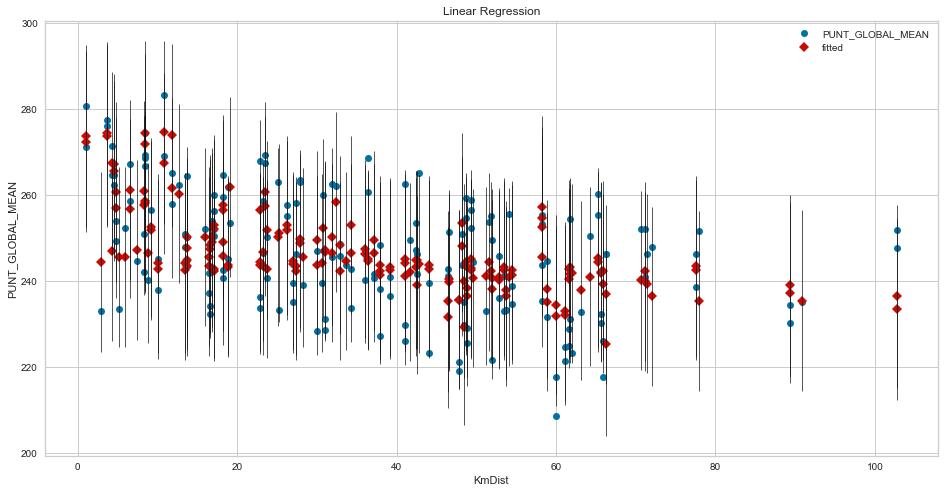

In [321]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.api as smg
fig, ax = plt.subplots()
indep_var_index =1 # age_years
fig = smg.plot_fit(fitted, 3, ax=ax)
ax.set_title("Linear Regression")

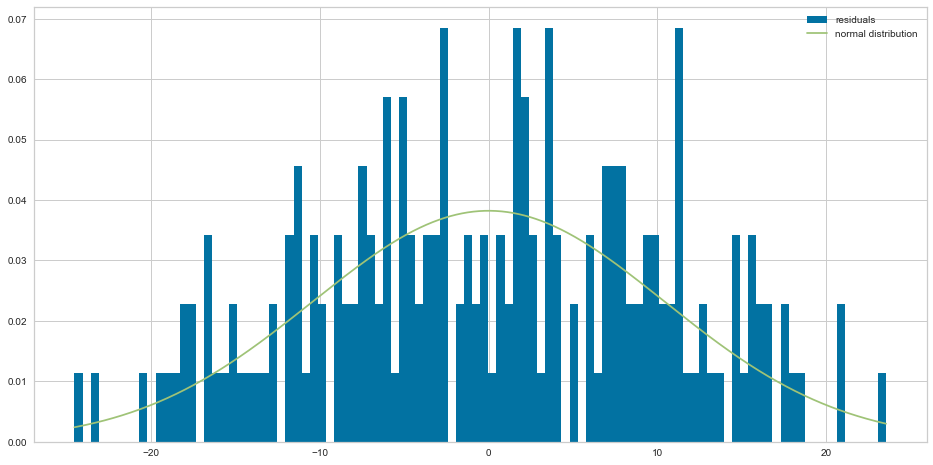

In [322]:
import seaborn as sns
import scipy
plt.hist(fitted.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )
# now plot the normal distribution for comparison
xx = np.linspace(fitted.resid.min(), fitted.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(fitted.scale)),
    label="normal distribution")
outliers = np.abs(fitted.resid)>4*np.sqrt(fitted.scale)
sns.rugplot(fitted.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right");

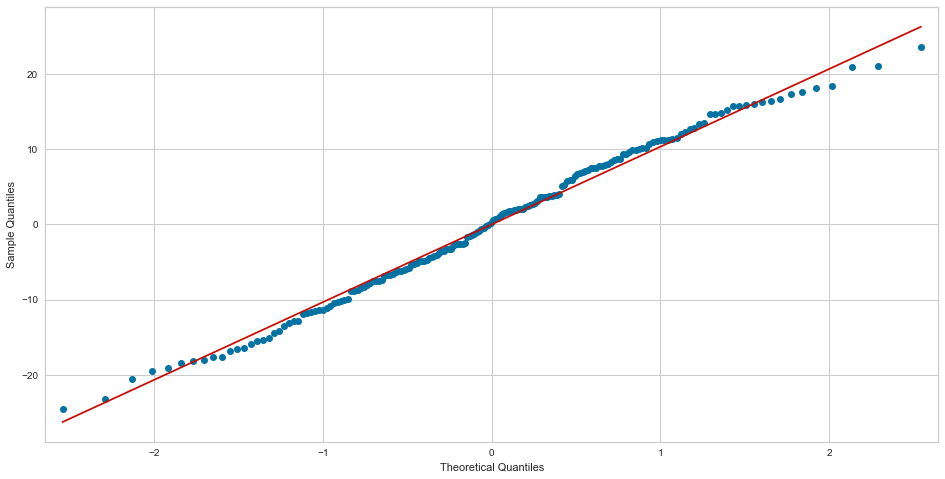

In [323]:
sm.qqplot(fitted.resid, line="s");

In [324]:
# base code
import statsmodels
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

In [325]:
cls = Linear_Reg_Diagnostic(fitted)

__A. Residual vs Fitted values__

Graphical tool to identify non-linearity.

In the graph red (roughly) horizontal line is an indicator that the residual has a linear pattern.

<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

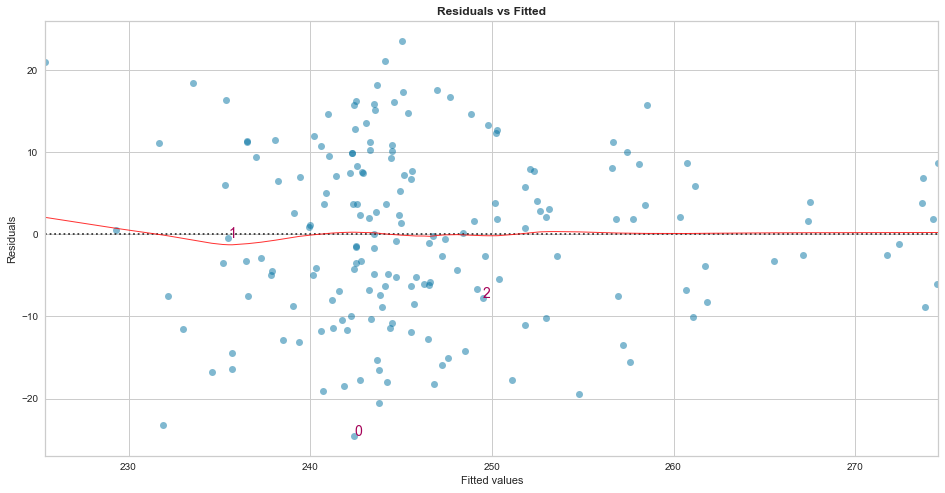

In [326]:
cls.residual_plot()

__B. Standarized Residual vs Theoretical Quantile__

This plot is used to visually check if residuals are normally distributed.

Points spread along the diagonal line will suggest so.

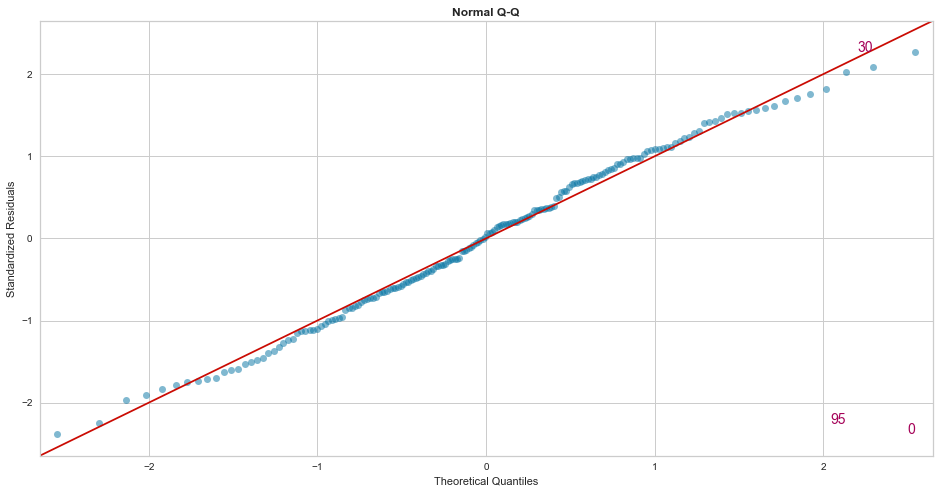

In [327]:
cls.qq_plot();

__C. Sqrt(Standarized Residual) vs Fitted values__

This plot is used to check homoscedasticity of the residuals.

A near horizontal red line in the graph would suggest so.

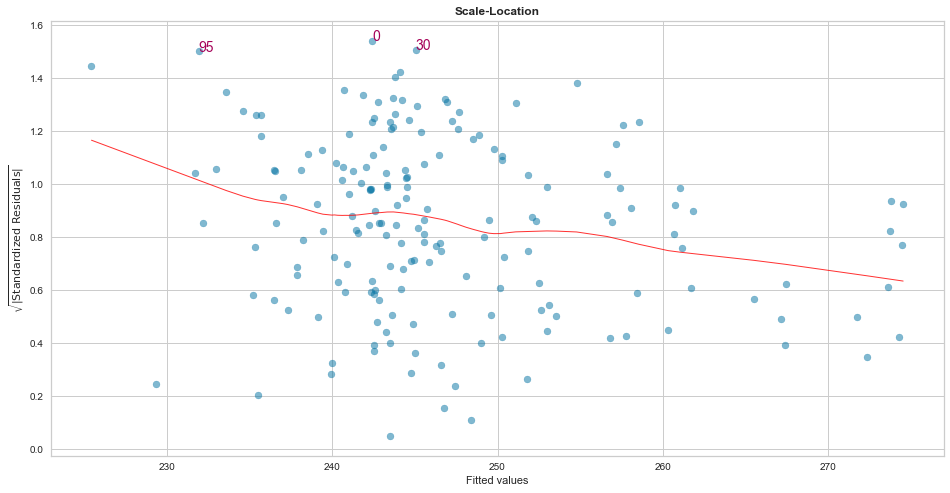

In [328]:
cls.scale_location_plot();

__D. Residual vs Leverage__

Points falling outside the Cook’s distance curves are considered observation that can sway the fit aka are influential.

Good to have no points outside these curves.

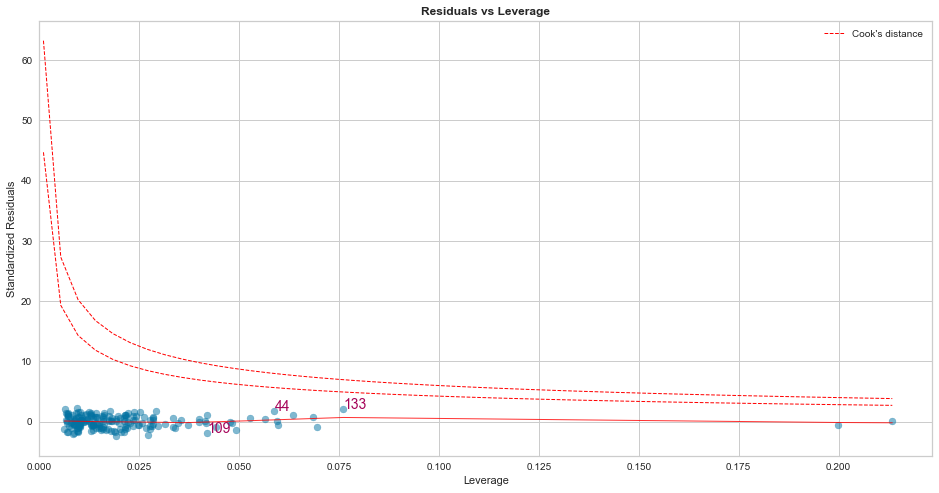

In [329]:
cls.leverage_plot();

__E. VIF__

The variance inflation factor (VIF), is a measure of multicollinearity.

VIF > 5 for a variable indicates that it is highly collinear with the other input variables.

In [330]:
cls.vif_table()

                Features  VIF Factor
3                 KmDist        1.32
2  INDICADOR_GAS_NATURAL        1.61
1     INDICADOR_INTERNET        1.98
0              Intercept        7.34


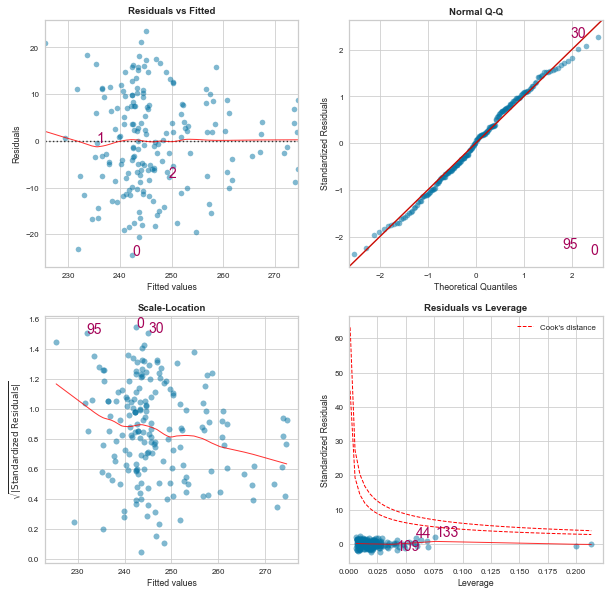

                Features  VIF Factor
3                 KmDist        1.32
2  INDICADOR_GAS_NATURAL        1.61
1     INDICADOR_INTERNET        1.98
0              Intercept        7.34


In [331]:
# Alternatively, all diagnostics can be generated in one go as follows.
# Fig and ax can be used to modify axes or plot properties after the fact.
cls = Linear_Reg_Diagnostic(fitted)
fig, ax = cls()

In [332]:
data_unseen['INDICADOR_GAS_NATURAL'] = data_unseen['INDICADOR_GAS_NATURAL'].astype(float)
prediccion = fitted.predict(data_unseen.loc[:, data_unseen.columns != 'PUNT_GLOBAL_MEAN'])
print(prediccion)

0     243.428105
1     247.434875
2     245.069018
3     249.424697
4     241.325671
5     239.793213
6     245.644747
7     255.820535
8     243.616604
9     254.611137
10    239.774667
11    258.195401
12    248.455138
13    243.278824
14    245.524734
15    239.223053
16    237.762110
17    239.662279
18    245.632406
19    245.765103
20    246.671800
21    241.159729
22    244.111318
23    241.769763
24    266.340618
25    240.358862
26    248.768794
27    231.744056
28    246.137653
29    240.454459
30    236.873284
31    243.474597
32           NaN
33           NaN
34    250.345457
35    254.214406
36    239.402806
37    254.973444
38    244.814142
39    241.437205
40    250.541401
41    245.235091
42    242.437808
43    242.621401
44    242.714372
45    248.140372
dtype: float64


In [340]:
data_unseen['PUNT_GLOBAL_MEAN'].mean()

245.11216091268074

In [339]:
prediccion

0     243.428105
1     247.434875
2     245.069018
3     249.424697
4     241.325671
5     239.793213
6     245.644747
7     255.820535
8     243.616604
9     254.611137
10    239.774667
11    258.195401
12    248.455138
13    243.278824
14    245.524734
15    239.223053
16    237.762110
17    239.662279
18    245.632406
19    245.765103
20    246.671800
21    241.159729
22    244.111318
23    241.769763
24    266.340618
25    240.358862
26    248.768794
27    231.744056
28    246.137653
29    240.454459
30    236.873284
31    243.474597
32           NaN
33           NaN
34    250.345457
35    254.214406
36    239.402806
37    254.973444
38    244.814142
39    241.437205
40    250.541401
41    245.235091
42    242.437808
43    242.621401
44    242.714372
45    248.140372
dtype: float64

In [348]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rmse = mean_squared_error(data_unseen['PUNT_GLOBAL_MEAN'], prediccion.fillna(245.11216091268074), squared=False)
mse = mean_squared_error(data_unseen['PUNT_GLOBAL_MEAN'], prediccion.fillna(245.11216091268074), squared=True)
r2score = r2_score(data_unseen['PUNT_GLOBAL_MEAN'], prediccion.fillna(245.11216091268074))


In [346]:
mse

138.7126040110483

In [347]:
rmse

11.777631511091197

In [349]:
r2score

0.020757962834989985